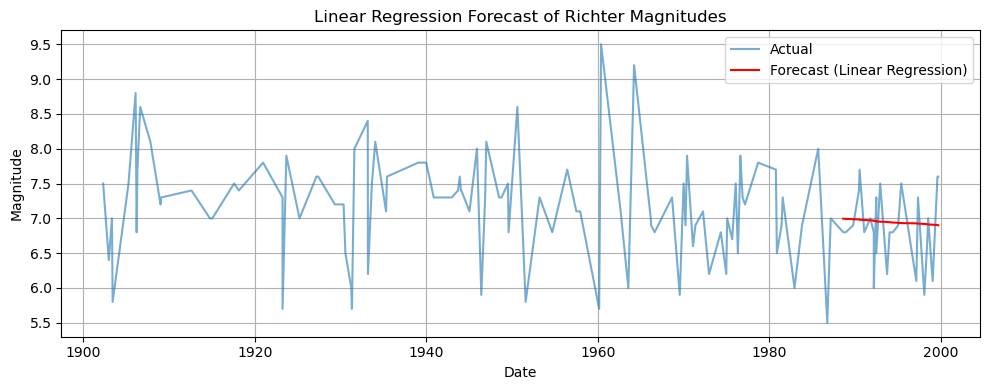

Root Mean Squared Error (RMSE): 0.5259


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load and preprocess dataset
df = pd.read_csv('earthquakes.csv')
df['month'] = pd.to_datetime(df['month'], format='%B').dt.month
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
richter_series = df['richter'].dropna()

# Step 1: Prepare time variable (t = 0, 1, 2, ..., n)
richter_series = richter_series.reset_index()
richter_series['t'] = np.arange(len(richter_series))
X = richter_series[['t']]
y = richter_series['richter']

# Step 2: Split into train and test sets
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Step 3: Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Plot
plt.figure(figsize=(10, 4))
plt.plot(richter_series['date'], y, label='Actual', alpha=0.6)
plt.plot(richter_series['date'].iloc[split_index:], y_pred, label='Forecast (Linear Regression)', color='red')
plt.title('Linear Regression Forecast of Richter Magnitudes')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
